<a class="anchor" id="0.1"></a>
## Table of Content
***

0. [Step-00: Import Libraries](#0)

<!-- *** -->

1. [Step-01: Import Dataset](#1)
   - 1.1 [Data Overview](#1.1)
   - 1.2 [Missing Values](#1.2)
   - 1.3 [Numerical Features](#1.3)
   - 1.4 [Discrete Features](#1.4)
   - 1.5 [Continuous Features](#1.5)
   - 1.6 [Catagorical Features](#1.6)
   
<!-- *** -->

2. [Step-02: Data Engineering](#2)
   - 2.1 [Exploratory Data Analysis. (EDA)](#2.1)
     - 2.1.1 [Before Normalization with (Plotting)](#2.1.1)
     - 2.1.2 [Apply Yeo-Johnson transformation](#2.1.2)
     - 2.1.3 [After Normalization with (Plotting)](#2.1.3)
   - 2.2 [Data Wrangling](#2.2)
     - 2.2.1 [Features Encoding](#2.2.1)
     - 2.2.2 [Features Scaling](#2.2.2)

<!-- *** -->

1. [Step-03: Data Cleaning or Organize](#3)
   - 3.1 [Remove Outliers](#3.1)

<!-- *** -->

4. [Step-04: Splitting (Training and Testing) Data](#4)

<!-- *** -->

5. [Step-05: Apply Techniques or Models](#5)
   - 5.1 [Decision Tree](#5.1)
   - 5.2 [Random Forest](#5.2)
   - 5.3 [Gaussian Naive Bayes](#5.3)
   - 5.4 [K-Nearest Neighbors](#5.4)
   - 5.5 [Logistic Regression](#5.5)

<!-- *** -->

6. [Step-06: Evaluate or Compare Models Accuracy](#6)

<!-- *** -->

7. [Apply Cross-Validation](#7)

<!-- *** -->

8. [Best Technique](#8)


## <span style="color:orange">Techniques:
- <span style="color:yellow">**Decision Tree**</span>
- <span style="color:yellow">**Gaussian Naive Bayes**</span>
- <span style="color:yellow">**Logistic Regression**</span>

### Problem:<span style="color:red"> **Classification**</span>

### Dataset: <span style="color:magenta">**Titanic_Survived Prediction !**</span>

***

***

### <span style="color:cyan">Step: 00</span>: (Import Libraries) 

<a class="anchor" id="0"></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### <span style="color:cyan">Step: 01</span>: (Import Dataset)

<a class="anchor" id="1"></a>

In [2]:
# import Dataset !

df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [4]:
df = df.drop(['deck'], axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [5]:
df['age'] = df['age'].replace(np.nan, df.age.mean())
df['age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [6]:
df = df.dropna()

In [7]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
670,1,2,female,40.0,1,1,39.00,S,Second,woman,False,Southampton,yes,False
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False
440,1,2,female,45.0,1,1,26.25,S,Second,woman,False,Southampton,yes,False


***

#### Data Overview

<a class="anchor" id="1.1"></a>


In [8]:
df.shape

(889, 14)

In [9]:
df.nunique()

survived         2
pclass           3
sex              2
age             89
sibsp            7
parch            7
fare           247
embarked         3
class            3
who              3
adult_male       2
embark_town      3
alive            2
alone            2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          889 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     889 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 92.0+ KB


In [11]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,-0.555520,-0.206207
pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,0.090098,0.138553
age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,0.258966,0.177712
sibsp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,-0.255401,-0.584186
parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,-0.351945,-0.583112
fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,-0.179851,-0.274079
adult_male,-0.555520,0.090098,0.258966,-0.255401,-0.351945,-0.179851,1.000000,0.407992
alone,-0.206207,0.138553,0.177712,-0.584186,-0.583112,-0.274079,0.407992,1.000000


In [13]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
df.min()

survived               0
pclass                 1
sex               female
age                 0.42
sibsp                  0
parch                  0
fare                 0.0
embarked               C
class              First
who                child
adult_male         False
embark_town    Cherbourg
alive                 no
alone              False
dtype: object

In [15]:
df.max()

survived                 1
pclass                   3
sex                   male
age                   80.0
sibsp                    8
parch                    6
fare              512.3292
embarked                 S
class                Third
who                  woman
adult_male            True
embark_town    Southampton
alive                  yes
alone                 True
dtype: object

#### Missing Values

<a class="anchor" id="1.2"></a>


In [16]:
for feature in df:
    if df[feature].isnull().sum()>1:
        print(feature,":", np.round(df[feature].isnull().mean(),4),'%')
    
else:
     print("There is no Null Values")

There is no Null Values


#### Numerical Features

<a class="anchor" id="1.3"></a>


In [17]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_features))
df[numerical_features].head()

The length of Numerical_values is : 8


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
0,0,3,22.0,1,0,7.2500,True,False
1,1,1,38.0,1,0,71.2833,False,False
2,1,3,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,False
4,0,3,35.0,0,0,8.0500,True,True


#### Discrete Features 

<a class="anchor" id="1.4"></a>


In [18]:
discrete_Feature = [feature for feature in numerical_features if len(df[feature].unique())<25]

print("The Discrete feature is :",len(discrete_Feature))
discrete_Feature

The Discrete feature is : 6


['survived', 'pclass', 'sibsp', 'parch', 'adult_male', 'alone']

#### Continuous Features

<a class="anchor" id="1.5"></a>


In [19]:
continous_Feature = [feature for feature in numerical_features if feature not in discrete_Feature]

print("The Continous feature is :",len(continous_Feature))
continous_Feature

The Continous feature is : 2


['age', 'fare']

In [20]:
df[continous_Feature].head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


#### Categorical Features

<a class="anchor" id="1.6"></a>


In [21]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

6


['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']

In [22]:
df[categorical_feature].head()

,sex,embarked,class,who,embark_town,alive
0,male,S,Third,man,Southampton,no
1,female,C,First,woman,Cherbourg,yes
2,female,S,Third,woman,Southampton,yes
3,female,S,First,woman,Southampton,yes
4,male,S,Third,man,Southampton,no


---

### <span style="color:cyan">Step: 02</span>: Data Engineering

<a class="anchor" id="2"></a>

#### <span style="color:blue">**Exploratory Data Analysis. (EDA)**</span>


<a class="anchor" id="2.1"></a>

In [23]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290,-0.555520,-0.206207
pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193,0.090098,0.138553
age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604,0.258966,0.177712
sibsp,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887,-0.255401,-0.584186
parch,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532,-0.351945,-0.583112
fare,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000,-0.179851,-0.274079
adult_male,-0.555520,0.090098,0.258966,-0.255401,-0.351945,-0.179851,1.000000,0.407992
alone,-0.206207,0.138553,0.177712,-0.584186,-0.583112,-0.274079,0.407992,1.000000


<AxesSubplot:>

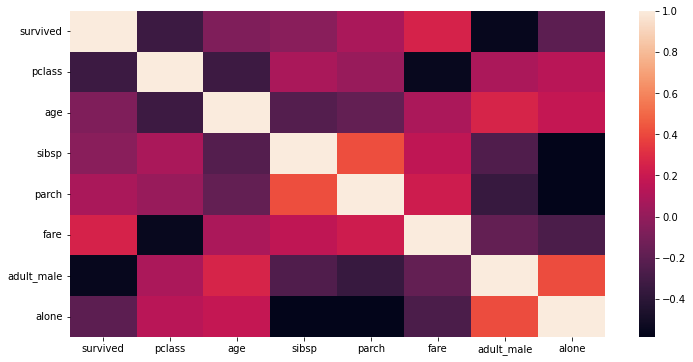

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

<AxesSubplot:>

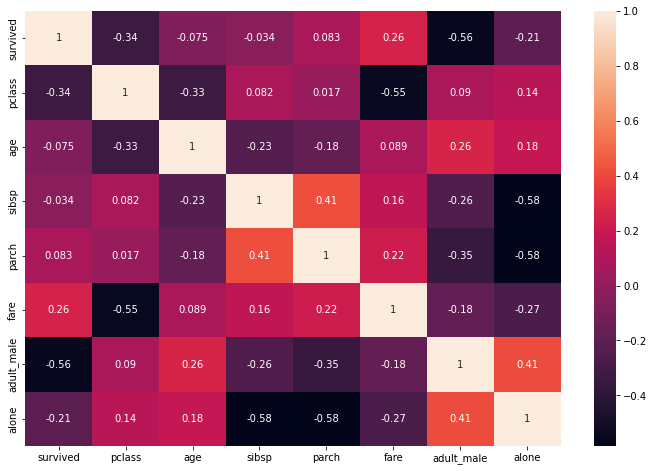

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [26]:
conti = [i for i in df.columns if i not in ['sex', 'embarked', 'class', 'who',
                                            'adult_male', 'embark_town', 'alive', 'alone']]

***

##### Before Normalization with (Plotting)

<a class="anchor" id="2.1.1"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


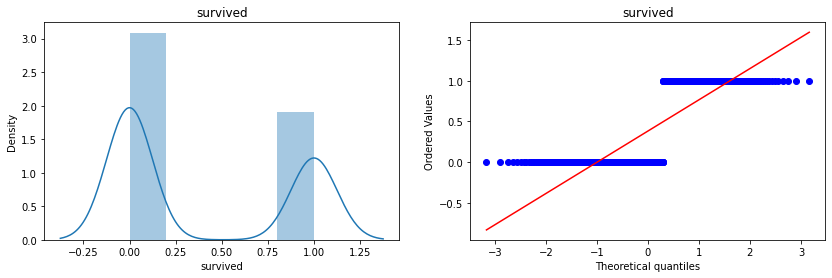

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


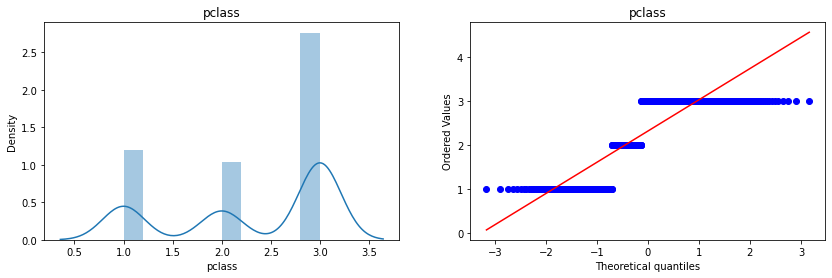

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


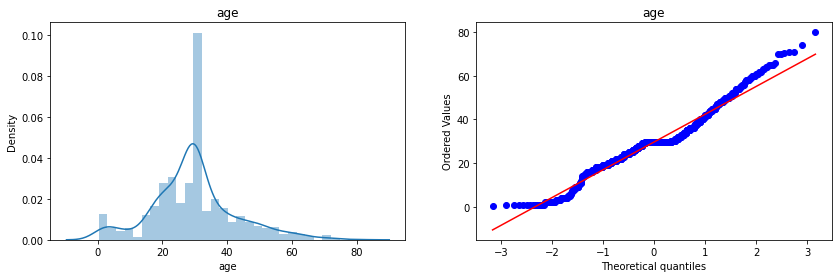

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


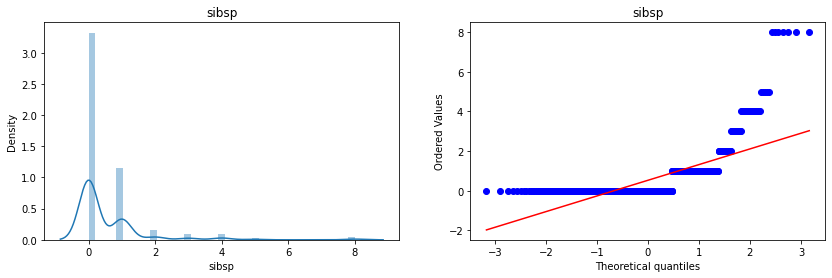

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


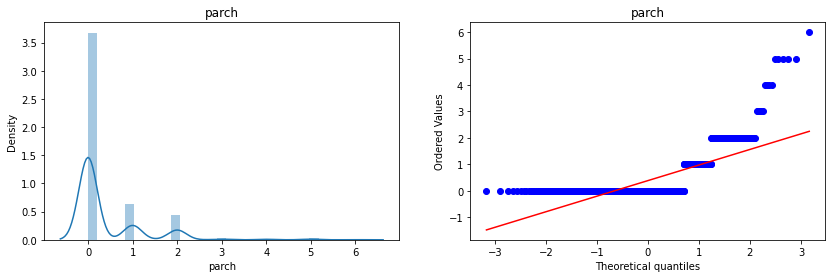

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


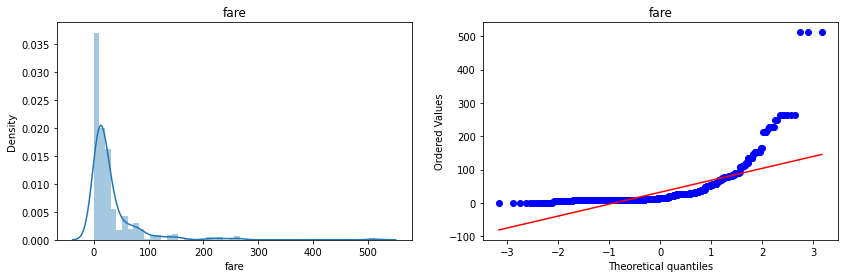

In [27]:
# Plotting the distplots without any transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [28]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

##### Apply Yeo-Johnson transform

<a class="anchor" id="2.1.2"></a>

In [29]:
features_normalize =[n for n in df.columns if n not in ['survived', 'sex', 'embarked', 'class', 'who',
                                                        'adult_male', 'embark_town', 'alive', 'alone',
                                                        'parch', 'pclass', 'sibsp']]
pt = PowerTransformer()
df[features_normalize] = pt.fit_transform(df[features_normalize]+0.00001)

In [30]:
df[features_normalize] = pd.DataFrame(df[features_normalize])
pd.DataFrame({'cols':df[features_normalize].columns,'Yeo_Johnson_lambdas':pt.lambdas_})

,cols,Yeo_Johnson_lambdas
0,age,0.821668
1,fare,-0.098575


##### After Normalization with (Plotting)

<a class="anchor" id="2.1.3"></a>

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


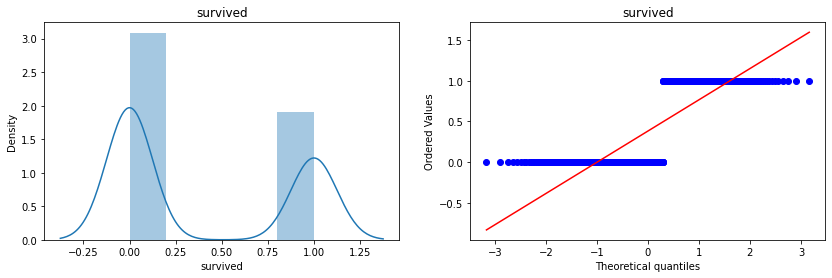

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


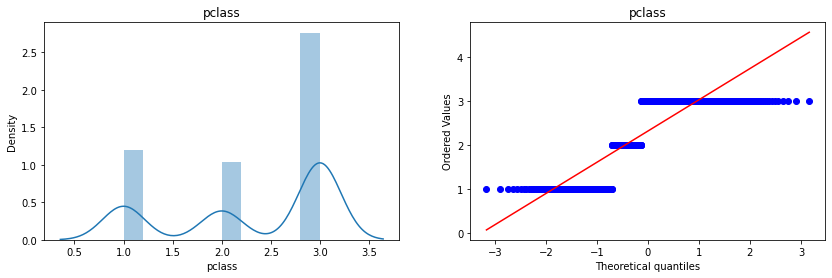

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


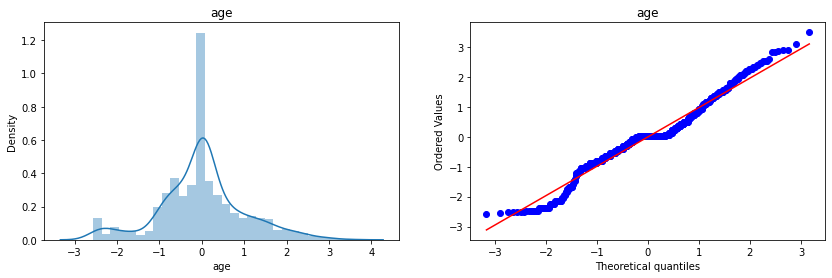

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


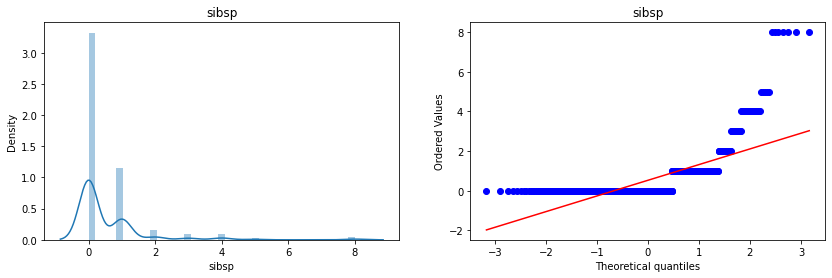

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


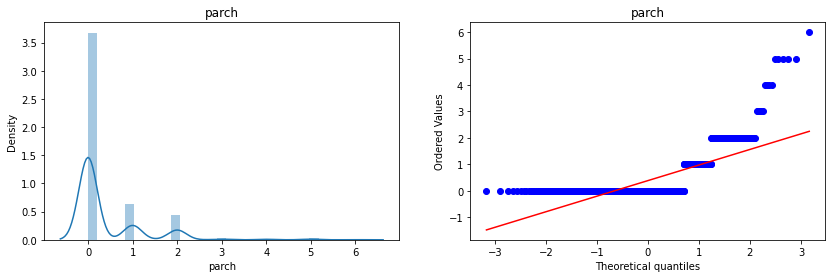

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


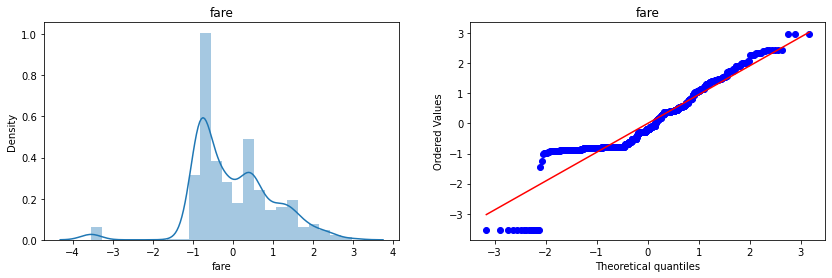

In [31]:
# Plotting the distplots with after transformation

for col in df[conti]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

***

#### <span style="color:blue">**Data Wrangling**</span>

<a class="anchor" id="2.2"></a>

In [33]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [34]:
df.shape

(889, 14)

##### Feature Encoding

<a class="anchor" id="2.2.1"></a>

In [35]:
encoding = LabelEncoder()

encode_feature = [x for x in df.columns if x not in ['survived','pclass','age','sibsp','parch', 'fare']]
for i in encode_feature:
    df[i] = encoding.fit_transform(df[i])


In [36]:
df[encode_feature].head(1)

,sex,embarked,class,who,adult_male,embark_town,alive,alone
0,1,2,2,1,1,2,0,0


In [37]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,-0.554560,1,0,-0.876581,2,2,1,1,2,0,0
1,1,1,0,0.661897,1,0,1.341242,0,0,2,0,0,1,0
2,1,3,0,-0.239235,0,0,-0.787661,2,2,2,0,2,1,1
3,1,1,0,0.441937,1,0,1.071865,2,0,2,0,2,1,0
4,0,3,1,0.441937,0,0,-0.772006,2,2,1,1,2,0,1


##### Feature Scaling

<a class="anchor" id="2.2.2"></a>

In [38]:
features_scale =[i for i in df.columns if i in ['pclass', 'age', 'sibsp', 'parch', 
                                                'fare', 'embarked', 'class', 'who', 
                                                'adult_male', 'embark_town', 'alive', 'alone']]

scaler = MinMaxScaler()
df[features_scale] = scaler.fit_transform(df[features_scale])

In [39]:
df[features_scale].head(1)


,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1.0,0.331314,0.125,0.0,0.408744,1.0,1.0,0.5,1.0,1.0,0.0,0.0


In [40]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,1.0,1,0.331314,0.125,0.0,0.408744,1.0,1.0,0.5,1.0,1.0,0.0,0.0
1,1,0.0,0,0.531623,0.125,0.0,0.749215,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1.0,0,0.383237,0.000,0.0,0.422394,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,1,0.0,0,0.495403,0.125,0.0,0.707861,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0,1.0,1,0.495403,0.000,0.0,0.424798,1.0,1.0,0.5,1.0,1.0,0.0,1.0


***

### <span style="color:cyan">Step: 03</span>: Data Cleaned or Organize

<a class="anchor" id="3"></a>

#### Remove Outliers

<a class="anchor" id="3.1"></a>

In [41]:
outliers = [i for i in df.columns if i not in ['survived']]

In [42]:
print("Before Cleaning:", df.shape)

Before Cleaning: (889, 14)


Before Removing Outliers


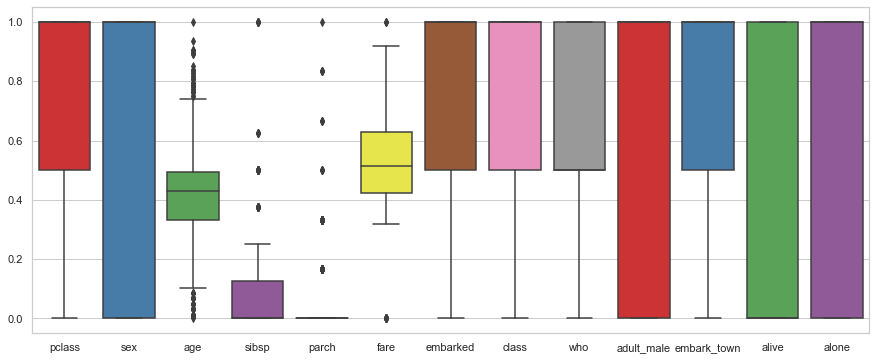

In [43]:
print("Before Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="Set1")
plt.show()            

***

Before Removing (age) outliers


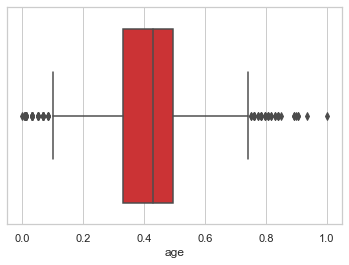

After Removing (age) outliers


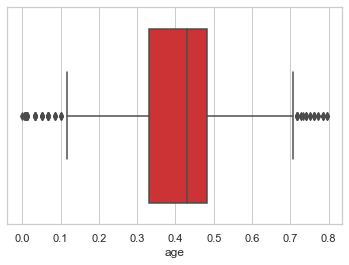

In [44]:
# age

print("Before Removing (age) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="age",
            palette="Set1")
plt.show()            

df = df[df['age']<0.8] 


print("After Removing (age) outliers")
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df,
            x="age",
            palette="Set1")
plt.show()            

In [45]:
print("Shape:", df.shape)

Shape: (871, 14)


***

In [46]:
print("After Cleaning:", df.shape)

After Cleaning: (871, 14)


After Removing Outliers


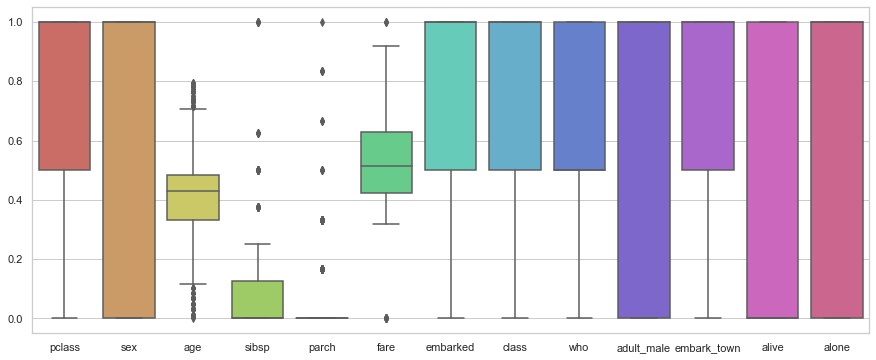

In [47]:
print("After Removing Outliers")
plt.figure(figsize=(15,6))
sns.set_theme(style="whitegrid", color_codes=True)
sns.boxplot(data=df[outliers],
            palette="hls")
plt.show()            

***

### <span style="color:cyan">Step: 04</span>: Splitting Dataset into (Training and Testing) Data 

<a class="anchor" id="4"></a>

In [48]:
X = df.drop(['survived'], axis=1)
y = df[['survived']]

In [49]:
X.sample(5)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
281,1.0,1,0.408675,0.000,0.000000,0.421017,1.0,1.0,0.5,1.0,1.0,0.0,1.0
172,1.0,0,0.012157,0.125,0.166667,0.474697,1.0,1.0,0.0,0.0,1.0,1.0,0.0
509,1.0,1,0.383237,0.000,0.000000,0.716648,1.0,1.0,0.5,1.0,1.0,1.0,1.0
519,1.0,1,0.458640,0.000,0.000000,0.421828,1.0,1.0,0.5,1.0,1.0,0.0,1.0
440,0.5,0,0.614286,0.125,0.166667,0.605152,1.0,0.5,1.0,0.0,1.0,1.0,0.0


In [50]:
y.sample(5)

,survived
889,1
821,1
657,0
367,1
40,0


In [51]:
y['survived'].unique()

array([0, 1], dtype=int64)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***

### <span style="color:cyan">Step: 05</span>: Apply Techniques !

<a class="anchor" id="5"></a>

### **Model Building**

<a class="anchor" id="5"></a>

#### <span style="color:yellow">Decision Tree Classifier</span>

<a class="anchor" id="5.1"></a>

In [53]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_model

DecisionTreeClassifier()

In [54]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

# Decision tree
dt_score = np.round(accuracy_score(y_test, y_pred_dt)*100, 3)
print("Decision tree:", dt_score)

Decision tree: 100.0


#### <span style="color:yellow">Random Forest Classifier</span>

<a class="anchor" id="5.2"></a>

In [55]:
# RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)
rf_model

C:\Users\fahad\AppData\Local\Temp\ipykernel_18244\110523400.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = RandomForestClassifier(n_estimators=1).fit(X_train, y_train)


RandomForestClassifier(n_estimators=1)

In [56]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Random forest
rf_score = np.round(accuracy_score(y_test, y_pred_rf)*100, 3)
print("Random forest:", rf_score)

Random forest: 96.0


#### <span style="color:yellow">Gaussian Naive Bayes</span>

<a class="anchor" id="5.3"></a>

In [57]:
# GaussianNaiveBayes

gnb_model = GaussianNB().fit(X_train, y_train)
gnb_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [58]:
y_pred_gnb = gnb_model.predict(X_test)
y_pred_gnb

# Gussian Naive Bays
gnb_score = np.round(accuracy_score(y_test, y_pred_gnb)*100, 3)
print("GussianNB:", gnb_score)

GussianNB: 100.0


#### <span style="color:yellow">K-Nearest Neighbors Classifier</span>

<a class="anchor" id="5.4"></a>

In [59]:
# KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [60]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

# K_Nearest Neighbours 
knn_score = np.round(accuracy_score(y_test, y_pred_knn)*100, 3)
print("KNN:", knn_score)

KNN: 100.0


#### <span style="color:yellow">Logistic Regression</span>

<a class="anchor" id="5.5"></a>

In [61]:
# LogisticRegression

lr_model = LogisticRegression().fit(X_train, y_train)
lr_model

C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [62]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

# Logistic Regression 
lr_score = np.round(accuracy_score(y_test, y_pred_lr)*100, 3)
print("Logistic Regression:", lr_score)

Logistic Regression: 100.0


***

### <span style="color:cyan">Step: 06</span>: Evaluate or Compare Models Accuracy

<a class="anchor" id="6"></a>

In [63]:
data={'Decision tree'            :[dt_score],
      'Random Forest'            :[rf_score],
      'Gaussian_NB'              :[gnb_score],
      'KNN'                      :[knn_score],
      'Logistic Regression'      :[lr_score]
}

In [64]:
Evaluation = pd.DataFrame(data, index=['Score'])
Evaluation

,Decision tree,Random Forest,Gaussian_NB,KNN,Logistic Regression
Score,100.0,96.0,100.0,100.0,100.0


***

#### <span style="color:magenta">**Apply Cross-Validation**</span>

<a class="anchor" id="7"></a>

In [65]:
dt_validate = np.round(cross_val_score(dt_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of DT:", dt_validate)

After cross validation of DT: 100.0


***

In [66]:
data1={'Decision tree'            :[dt_score],
      'Cross-validate DT'        :[dt_validate]
}

In [67]:
Evaluation = pd.DataFrame(data1, index=['Score'])
Evaluation

,Decision tree,Cross-validate DT
Score,100.0,100.0


***

In [68]:
rf_validate = np.round(cross_val_score(rf_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of RF:", rf_validate)

After cross validation of RF: 97.473


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed

***

In [69]:
data2={'Random Forest'            :[rf_score],
      'Cross-validate RF'         :[rf_validate]
}

In [70]:
Evaluation = pd.DataFrame(data2, index=['Score'])
Evaluation

,Random Forest,Cross-validate RF
Score,96.0,97.473


***

In [71]:
gnb_validate = np.round(cross_val_score(gnb_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of GNB:", gnb_validate)

After cross validation of GNB: 100.0


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

***

In [72]:
data3={'Gaussian Naive Bayes'             :[gnb_score],
      'Cross-validate GNB'                :[gnb_validate]
}

In [73]:
Evaluation = pd.DataFrame(data3, index=['Score'])
Evaluation

,Gaussian Naive Bayes,Cross-validate GNB
Score,100.0,100.0


***

In [74]:
knn_validate = np.round(cross_val_score(knn_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of KNN:", knn_validate)

After cross validation of KNN: 99.54


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

***

In [75]:
data4={'K-Nearest Neighbours'             :[knn_score],
      'Cross-validate KNN'                :[knn_validate]
}

In [76]:
Evaluation = pd.DataFrame(data4, index=['Score'])
Evaluation

,K-Nearest Neighbours,Cross-validate KNN
Score,100.0,99.54


***

In [77]:
lr_validate = np.round(cross_val_score(lr_model, X, y, cv=5, scoring='accuracy').mean()*100, 3)
print("After cross validation of LR:", lr_validate)

After cross validation of LR: 100.0


C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fahad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

***

In [78]:
data5={'Logistic Regression'              :[lr_score],
      'Cross-validate LR'                 :[lr_validate]
}

In [79]:
Evaluation = pd.DataFrame(data5, index=['Score'])
Evaluation

,Logistic Regression,Cross-validate LR
Score,100.0,100.0


***

#### <span style="color:green">**Best Technique**</span>: 
- <span style="color:yellow">**Decision Tree**</span>
- <span style="color:yellow">**Gaussian Naive Bayes**</span>
- <span style="color:yellow">**Logistic Regression**</span>

<a class="anchor" id="8"></a>

In [80]:
data_best={'Decision tree'                   :[dt_score],
           'Cross-validate DT'               :[dt_validate],
           'Gaussian Naive Bayes'            :[gnb_score],
           'Cross-validate GNB'              :[gnb_validate],
           'Logistic Regression'             :[lr_score],
           'Cross-validate LR'               :[lr_validate]
}

In [81]:
Evaluation = pd.DataFrame(data_best, index=['Score'])
Evaluation

,Decision tree,Cross-validate DT,Gaussian Naive Bayes,Cross-validate GNB,Logistic Regression,Cross-validate LR
Score,100.0,100.0,100.0,100.0,100.0,100.0


***

***

***